In [3]:
import requests # para usar http

In [5]:
# esta es la página que leeremos
URL = "https://es.wikipedia.org/wiki/Alfabeto_Fon%C3%A9tico_Internacional"
wiki = requests.get(URL) # obtener página
wiki.status_code # vemos que el resultado es 200, es decir todo salió bien

200

In [6]:
# tal como hemos importado la página podemos mostrarla, pero está fea
print(wiki.text)

<!DOCTYPE html>
<html class="client-nojs" lang="es" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Alfabeto Fonético Internacional - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"bbbf5ab7-1acd-4da6-b9d2-1333b84b4e85","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Alfabeto_Fonético_Internacional","wgTitle":"Alfabeto Fonético Internacional","wgCurRevisionId":138551988,"wgRevisionId":138551988,"wgArticleId":39442,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Páginas con referencias con parámetros obsoletos","Wikipedia:Páginas con 

In [7]:
# si lo que queremos es importar un contenido multimedia podemos hacerlo con content
print(wiki.content) # la b'...' indica que lo que se imprime son bytes

b'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Alfabeto Fon\xc3\xa9tico Internacional - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"bbbf5ab7-1acd-4da6-b9d2-1333b84b4e85","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Alfabeto_Fon\xc3\xa9tico_Internacional","wgTitle":"Alfabeto Fon\xc3\xa9tico Internacional","wgCurRevisionId":138551988,"wgRevisionId":138551988,"wgArticleId":39442,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:P\xc3\xa1ginas con referencias con p

In [8]:
# podemos ver datos de la respuesta
wiki.headers

{'Date': 'Sat, 09 Oct 2021 23:38:46 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.8', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://es.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'es', 'Last-Modified': 'Thu, 07 Oct 2021 22:45:58 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '12195', 'X-Cache': 'cp1081 miss, cp1085 hit/5', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front", host;desc="cp1085"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'Permissions-Policy': 'interest-cohort=()', 'Set-Cookie': 

In [9]:
# tambien podemos obtener datos del request (pedido) que hicimos
wiki.request.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [10]:
# Además podemos comprobar que usamos get pal request
wiki.request.method

'GET'

In [12]:
# importamos beautifulsoup para parsear la informacion
# parsear es obtener datos importantes a partir de un mar de info
# es decir, vamos a encontrar la info importante del html que obtuvimos
from bs4 import BeautifulSoup

In [15]:
sopa = BeautifulSoup(wiki.text, "lxml") # le decimos que pasee usando lxml como referencia
print(sopa.prettify()) # lo muestro de forma linda

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Alfabeto Fonético Internacional - Wikipedia, la enciclopedia libre
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"bbbf5ab7-1acd-4da6-b9d2-1333b84b4e85","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Alfabeto_Fonético_Internacional","wgTitle":"Alfabeto Fonético Internacional","wgCurRevisionId":138551988,"wgRevisionId":138551988,"wgArticleId":39442,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Páginas con referencias con parámetros obsoletos","Wiki

In [35]:
# podemos obtener fácilmente datos de esta página
envoltura_imagen = sopa.find("a", attrs = {"class":"image"})
img = envoltura_imagen.img # de "a" sacamos el objeto img
imagen_link = img.get("src") # de img sacamos su dato src que contiene el link de la imagen pura
imagen_link = "https:" + imagen_link # la página no tenía la imagen con https: puesto, así que lo agregué
imagen_pedida = requests.get(imagen_link) # pedimos la imagen a la página


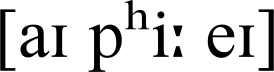

In [37]:
# pa mostrarla tengo que importar lo siguiente
from IPython.display import Image
Image(imagen_pedida.content)